IMPORT LIBRARIES

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Ignore Furure Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

LOAD DATA

In [3]:
# Load the dataset from csv file
df = pd.read_csv("../data/raw/house_data.csv")

EXPLORATORY DATA ANALYSIS

In [4]:
# Display the first few rows of the dataset
print(df.head(5))

   Id  LotFrontage  LotArea Street Alley Utilities LotConfig Neighborhood  \
0   1         65.0     8450   Pave   NaN    AllPub    Inside      CollgCr   
1   2         80.0     9600   Pave   NaN    AllPub       FR2      Veenker   
2   3         68.0    11250   Pave   NaN    AllPub    Inside      CollgCr   
3   4         60.0     9550   Pave   NaN    AllPub    Corner      Crawfor   
4   5         84.0    14260   Pave   NaN    AllPub       FR2      NoRidge   

  Condition1 Condition2  ... PoolArea PoolQC  Fence  MiscFeature  MiscVal  \
0       Norm       Norm  ...        0    NaN    NaN          NaN        0   
1      Feedr       Norm  ...        0    NaN    NaN          NaN        0   
2       Norm       Norm  ...        0    NaN    NaN          NaN        0   
3       Norm       Norm  ...        0    NaN    NaN          NaN        0   
4       Norm       Norm  ...        0    NaN    NaN          NaN        0   

  MoSold YrSold SaleType  SaleCondition SalePrice  
0      2   2008       

In [5]:
#Shape
print(df.shape)

(1460, 51)


In [6]:
#Names of Variabels
print(df.columns.tolist())

['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [7]:
# Print Categorical varables
print(df.select_dtypes(include=['object']).columns)

Index(['Street', 'Alley', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Heating', 'KitchenQual', 'Functional',
       'GarageType', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
# Check for missing values
df.isnull().sum()

Id                  0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
Utilities           0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
TotalBsmtSF         0
Heating             0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageType         81
GarageArea          0
GarageCond         81
PavedDrive          0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal   

In [19]:
# List varaibels with missing data
col_misingData = df.columns[df.isnull().any()].tolist()
print(col_misingData)

['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'GarageType', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
# Summary statistics of numerical features
df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.685262,1057.429452,1162.626712,346.992466,...,2.866438,1.046575,6.517808,0.613014,472.980137,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,181.066207,438.705324,386.587738,436.528436,...,0.815778,0.220338,1.625393,0.644666,213.804841,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,795.750000,882.000000,0.000000,...,2.000000,1.000000,5.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,991.500000,1087.000000,0.000000,...,3.000000,1.000000,6.000000,1.000000,480.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,166.000000,1298.250000,1391.250000,728.000000,...,3.000000,1.000000,7.000000,1.000000,576.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,...,8.000000,3.000000,14.000000,3.000000,1418.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


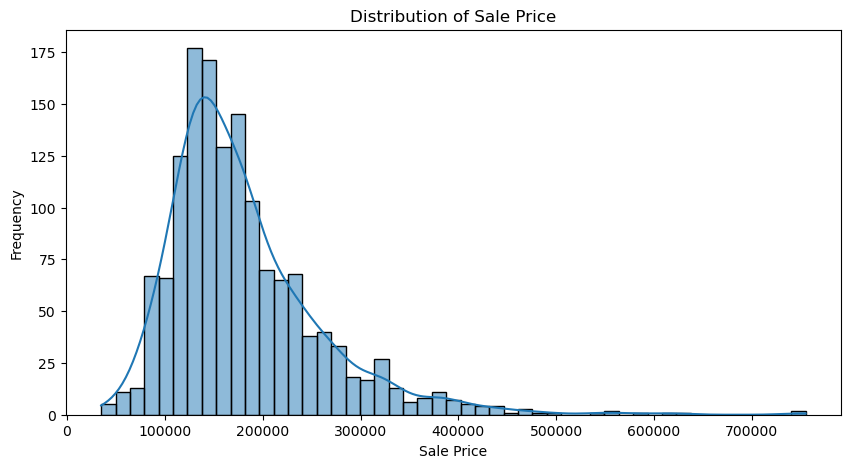

In [15]:
# Visualize the distribution of the target variable (house prices)
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Handle Missing Data

MICE Method

In [33]:
# Separate features and target variable
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']
print(X.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'Heating', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')>


In [31]:
# Initialize the MICE Imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=373)

In [32]:
# Fit the imputer ont he dataset
X_imputed = imputer.fit_transform(X)
print(X_imputed)

ValueError: could not convert string to float: 'Pave'

In [20]:
# Convert the array back to a pandas dataframe
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
print(X_imputed_df)

          Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1.0         65.0   8450.0          7.0          5.0     2003.0   
1        2.0         80.0   9600.0          6.0          8.0     1976.0   
2        3.0         68.0  11250.0          7.0          5.0     2001.0   
3        4.0         60.0   9550.0          7.0          5.0     1915.0   
4        5.0         84.0  14260.0          8.0          5.0     2000.0   
...      ...          ...      ...          ...          ...        ...   
1455  1456.0         62.0   7917.0          6.0          5.0     1999.0   
1456  1457.0         85.0  13175.0          6.0          6.0     1978.0   
1457  1458.0         66.0   9042.0          7.0          9.0     1941.0   
1458  1459.0         68.0   9717.0          5.0          6.0     1950.0   
1459  1460.0         75.0   9937.0          5.0          6.0     1965.0   

      MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0          196.0        8

The following code is to use for method that does't use categorical and requires categorical features to be converted to numerical before handing the missing data

In [29]:
"""
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical using Ordinal Encoding
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Fit the imputer on the dataframe
df_imputed = mice_imputer.fit_transform(df)

# Convert the array returned by MICE back into a pandas dataframe
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Convert the imputed numerical columns back to their original type
df_imputed[numerical_cols] = df_imputed[numerical_cols].astype('float64')

# Convert the imputed categorical columns back to their original type
df_imputed[categorical_cols] = encoder.inverse_transform(df_imputed[categorical_cols])
df_imputed[categorical_cols] = df_imputed[categorical_cols].astype('object')
"""


"\n# Separate numerical and categorical columns\nnumerical_cols = df.select_dtypes(include=['int64', 'float64']).columns\ncategorical_cols = df.select_dtypes(include=['object']).columns\n\n# Convert categorical columns to numerical using Ordinal Encoding\nencoder = OrdinalEncoder()\ndf[categorical_cols] = encoder.fit_transform(df[categorical_cols])\n\n# Initialize the MICE imputer\nmice_imputer = IterativeImputer()\n\n# Fit the imputer on the dataframe\ndf_imputed = mice_imputer.fit_transform(df)\n\n# Convert the array returned by MICE back into a pandas dataframe\ndf_imputed = pd.DataFrame(df_imputed, columns=df.columns)\n\n# Convert the imputed numerical columns back to their original type\ndf_imputed[numerical_cols] = df_imputed[numerical_cols].astype('float64')\n\n# Convert the imputed categorical columns back to their original type\ndf_imputed[categorical_cols] = encoder.inverse_transform(df_imputed[categorical_cols])\ndf_imputed[categorical_cols] = df_imputed[categorical_cols].as

### CHECKING OUTLIERS

In [ ]:
# Separate into numerical and categorical variables
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols= df.select_dtypes(include=['object']).columns
print(f'NUMERICAL VARIABLES: {num_cols}\n')
print(f'CAT VARIABLES: {cat_cols}')

In [ ]:
# Drop SlaePrice and ID
num_cols_filtered = num_cols.drop(['Id', 'SalePrice'])

# Convert list of num columns into dataframe
df_num = df[num_cols_filtered]
df_num

1. Outlier: Boxplot Method

In [ ]:
# Visualize numerical variables using box plots to check for outliers
plt.figure(figsize=(10,6))
sns.boxenplot(data=df[num_cols_filtered])
plt.xticks(rotation=45)
plt.show()

2. Outliers: Histplot Method

In [ ]:
# Visualize numerical variabels using histograms to check for distribution and outliers
plt.figure(figsize=(10,6))
for col in num_cols_filtered:
    sns.histplot(df_num[col], kde=True, bins=30, alpha=0.5, label=col)
plt.legend()
plt.title('Histogrsm of Numerical Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

3. Outliers: IQR Method

In [ ]:
# Calculate statistis for numerical variavels to identify outliers
summary_stats = df_num.describe()
Q1 = summary_stats.loc['25%', :]
Q3 = summary_stats.loc['75%', :]
IRQ = Q3 -Q1
print(IRQ)

In [ ]:
# Identify outliers using IQR method
outliers = ((df_num < (Q1 - 1.5 * IRQ)) | (df_num > (Q3 + 1.5 * IRQ))).any(axis=1)
df_outliers = df_num[outliers]
print(f"Outliers identified using IQR method: \n{df_outliers}")

4. Outliers: Z-Score Method

In [ ]:
# Identify Outliers using Z-Score Method
q1, q3 = np.percentile(df_num, [25,27])
print(q1, q3)

# Find hte IQR
iqr = q3 - q1
print(iqr)

In [ ]:
# Find the lower bound value and hte upper bound value
lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)
print(lower, upper)

# CORRELATION

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Correlation heatmap to check the relationship between numerical features and target variable
cmax = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cmax,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

1. Numerical Varialbes Correlation

# Calculate the correlation matrix
corr_max = df.corr()

# Use the heatmap function from seaborn to plot the correlation matrix
plt.figure(figsize=(10,6))
# Plot the heatmap
sns.heatmap(corr_max, annot=True, fmt='.2f', cmap='coolwarm')
# Focus on the 'SalePrice' correlations
SalePrcie_corr = corr_max['SalePrice'].sort_values(ascending=False)
print(SalePrcie_corr)

In [ ]:
# Visualize correlation relationship using scatter plot
# Replace x values to compare each predictor variables
sns.scatterplot(data=df, x='MiscVal', y='SalePrice')
plt.show()

In [ ]:
# Pairplot for scatter plots between numerical features and target variable
sns.pairplot(df,x_vars=['OverallCond','Fireplaces','FullBath'],y_vars=['SalePrice'])
plt.show()